<a href="https://colab.research.google.com/github/vineethkumar1608/datasciene1/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [21]:
bank=pd.read_csv("/content/bank-full.csv",sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [27]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


-No duplicates

In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- COnverting object to category

In [30]:
bank["job"]=bank["job"].astype('category')
bank["marital"]=bank["marital"].astype('category')
bank["education"]=bank["education"].astype('category')
bank["default"]=bank["default"].astype('category')
bank["housing"]=bank["housing"].astype('category')
bank["loan"]=bank["loan"].astype('category')
bank["contact"]=bank["contact"].astype('category')
bank["month"]=bank["month"].astype('category')
bank["poutcome"]=bank["poutcome"].astype('category')
bank["y"]=bank["y"].astype('category')

In [32]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [33]:
bank=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  45211 non-null  int64   
 1   default              45211 non-null  category
 2   balance              45211 non-null  int64   
 3   housing              45211 non-null  category
 4   loan                 45211 non-null  category
 5   day                  45211 non-null  int64   
 6   duration             45211 non-null  int64   
 7   campaign             45211 non-null  int64   
 8   pdays                45211 non-null  int64   
 9   previous             45211 non-null  int64   
 10  y                    45211 non-null  category
 11  job_admin.           45211 non-null  uint8   
 12  job_blue-collar      45211 non-null  uint8   
 13  job_entrepreneur     45211 non-null  uint8   
 14  job_housemaid        45211 non-null  uint8   
 15  job_management     

- Custom encoding

In [40]:
bank['default'] = np.where(bank['default'].str.contains("yes"), 1, 0)
bank['housing'] = np.where(bank['housing'].str.contains("yes"), 1, 0)
bank['loan'] = np.where(bank['loan'].str.contains("yes"), 1, 0)
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)


In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [43]:
X=pd.concat([bank.iloc[:,0:10],bank.iloc[:,11:]],axis=1)
Y=bank.iloc[:,10]

In [44]:
classifier=LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
Y_pred=classifier.predict(X)

In [48]:
Y_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})
Y_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [49]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(Y,Y_pred)
print(matrix)

[[39157   765]
 [ 4132  1157]]


In [50]:
((39157+1157)/(39157+765+4132+1157))*100

89.1685651721926

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



-ROC

Text(0, 0.5, 'True Positive Rate')

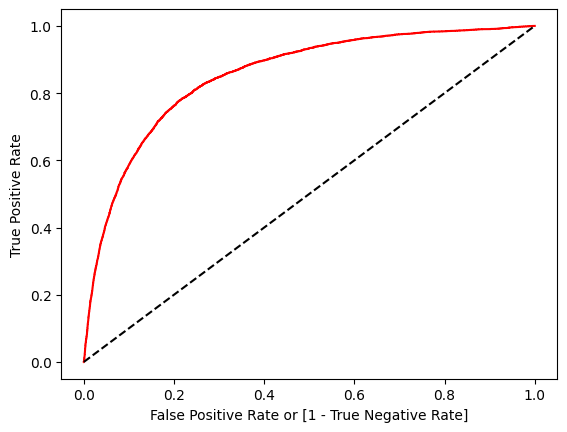

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, Y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [55]:
auc

0.5997967709372092